# **COVID-19: The Scenario in Brazil and the World**

![alt text](https://www.imagemhost.com.br/images/2020/06/21/1.jpg)
<p align="center">
<a align="center"href="https://www.freepik.com/free-photos-vectors/card">Card photo created by freepik - www.freepik.com</a>
</p>

## **Introduction**

The [coronavirus pandemic](https://www.who.int/health-topics/coronavirus#tab=tab_1) has already infected millions of people and killed hundreds of thousands around the world. The virus, [officially named as SARS-CoV-2](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)-and-the-virus-that-causes-it), is the cause of the infectious disease COVID-19. According to the [World Health Organization](https://www.who.int/), this new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019. 

Several countries have gone into lockdown, closed their borders and airports all over the world to try to stop the dissemination of the virus, which also [hit the global economy](https://www.bbc.com/news/business-52991913) hard as the world is still trying to understand e learn how to handle this new challenge.

## **The Data**

Since the outbreak, many institutions and people are working to gather data about the number of cases and deaths around the world. This is hardly an easy task to perform as the numbers come from governments who sometimes are arguably unreliable or incapable of gathering the real numbers for their countries.

In this project, we'll use the data provided by the [Our World In Data](https://ourworldindata.org/) website. According to [Wikipedia](https://en.wikipedia.org/wiki/Our_World_in_Data), Our World in Data is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality. As it is a respectable publication, the data provided by Our World in Data is as reliable as it can be.

Due to the high number of variables contained in the dataset we're using, they won't be listed here. If you want to see them all along with their description and main source, you can just click [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md) and see it on the[ Our World in Data COVID-19 GitHub repository](https://github.com/owid/covid-19-data).

## **The Project**

The main goal of this notebook is to follow, on a daily bases, the pandemic situation in Brazil, keeping track of the numbers of cases, deaths, and comparing the country's situation with other very affected countries. The project also aims to perform some analysis in the global situation during the COVID-19 pandemic.

**To make the daily update of this notebook easier and faster, there won't be many explanations about each chart. This is preferable than having explanations that do not match what the chart shows, what would inevitably happen since the situation changes fast.**

All the graphs will be pretty straight forward and easy to read. Also, as the subject is widely reported since the beginning of 2020, it is fair to assume that most people are already familiarized with it and capable of understanding the plots. Therefore, the great majority of the text present in this notebook is related to the code used.

Finally, please notice the output of the second cell showing the date of the last update in the notebook and take it into consideration while reading the rest of the project.







## **Exploratory Data Analysis**



We'll begin by importing:
* `pandas` for data manipulation;
* `matplotlib`, `seaborn` and `pywaffle` for data visualization;
* `datetime` to deal with dates.

After that, please notice the date of the last update in this notebook and consider it while reading.

In [1]:
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


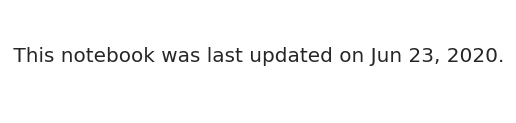

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pywaffle import  Waffle

sns.set()
%matplotlib inline

last_update = pd.to_datetime('today').date()
month = last_update.strftime('%b')

fig, ax = plt.subplots(figsize=(9, 2))
ax.text(x=0, y=0.5, s=f' This notebook was last updated on {month} {last_update.day}, {last_update.year}.', fontsize=20, ha='left')
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=False)
ax.grid(False)
ax.set_facecolor('white')
for key, spine in ax.spines.items():
  spine.set_visible(False)

Now, let's read the data into a dataframe and display its first five rows to understand its structure.

In [3]:
covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


We can see several lines representing the same country, one for each different date. The data is not structured as a single time series, but as a time series for each country.

Let's see the number of rows and columns.

In [4]:
covid.shape

(25707, 34)

We have dozen of thousands of rows and 34 columns.

Let's see more information about each column using the `info` method.

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25707 entries, 0 to 25706
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         25643 non-null  object 
 1   continent                        25467 non-null  object 
 2   location                         25707 non-null  object 
 3   date                             25707 non-null  object 
 4   total_cases                      25484 non-null  float64
 5   new_cases                        25484 non-null  float64
 6   total_deaths                     25484 non-null  float64
 7   new_deaths                       25484 non-null  float64
 8   total_cases_per_million          25420 non-null  float64
 9   new_cases_per_million            25420 non-null  float64
 10  total_deaths_per_million         25420 non-null  float64
 11  new_deaths_per_million           25420 non-null  float64
 12  total_tests       

The majority of the columns contain numeric data. Also, lots of them contain null values. Let's take a deeper look at that.

In [6]:
(covid.isnull().sum() / covid.shape[0] * 100).sort_values(ascending=False)

new_tests                          74.886218
new_tests_per_thousand             74.886218
total_tests_per_thousand           72.276034
total_tests                        72.276034
new_tests_smoothed_per_thousand    69.961489
new_tests_smoothed                 69.961489
tests_units                        67.561365
handwashing_facilities             59.407943
extreme_poverty                    40.288637
male_smokers                       28.190765
female_smokers                     27.358307
stringency_index                   19.543315
hospital_beds_per_thousand         17.197650
aged_65_older                      10.853075
gdp_per_capita                     10.588556
aged_70_older                      10.043957
median_age                          9.581048
cvd_death_rate                      9.522698
diabetes_prevalence                 6.550745
population_density                  4.317890
life_expectancy                     1.384837
new_deaths_per_million              1.116427
total_deat

As mentioned earlier, it was expected to have missing information in the data. We can now note that:

* All columns contain null data. The only exceptions are the `population`, `date`, `location`, and `iso_code` columns;

* The columns with the greats percentage of missing values are related to COVID-19 tests.

Moving forward, we'll transform the date column from string to datetime. Then, we'll use `dtypes` to check if the column was in fact transformed.

In [7]:
covid['date'] = pd.to_datetime(covid['date'])
covid.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


## **Global Scenario**

We'll begin to analyze the global situation of the COVID-19 pandemic by writing the `plot_total` function to create line charts for the `total_cases` and `total_deaths` columns for any country. The function receives three arguments:

* country: *string*
 * The name of the country. It also supports 'world'. 
* kind: *{'cases', 'deaths'}, default 'cases*'
 * The kind of data to plot.
* log: *bool default False*
 * If True, the chart will be created using the logarithmic scale

In [8]:
def plot_total(country, kind='cases', log=False):

    df = covid[(covid['location'] == country.title()) & (covid[f'total_{kind}'] > 0)]

    color = None
    marker = 'o'
    col_index = 4
    if kind.lower() == 'deaths':
        color='red'
        marker = 'P'
        col_index = 6

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df['date'], df[f'total_{kind}'], linewidth=3, color=color, marker=marker, markersize=12, markeredgecolor='w', markeredgewidth=0.5, markevery=[-1])

    log_title = ''
    if log:
        ax.set_yscale('log')
        log_title = ' - Logarithmic Scale'

    ax.set_title(f'Total COVID-19 {kind.title()} - {country.title()}{log_title}', alpha=0.7)

    limx = df.iloc[-1, 3] + dt.timedelta(days=20)
    ax.set_xlim(df.iloc[0, 3], limx)

    ax.text(x=df.iloc[-1, 3] + dt.timedelta(days=3), y=df.iloc[-1, col_index], s=f'{int(df.iloc[-1, col_index])}', alpha=0.4, fontsize=12)
    ax.grid(False)
    ax.tick_params(colors='grey')
    
    plt.tight_layout()
    plt.show()

We'll now use this function to plot the total number of cases and deaths in the world in a logarithmic scale.

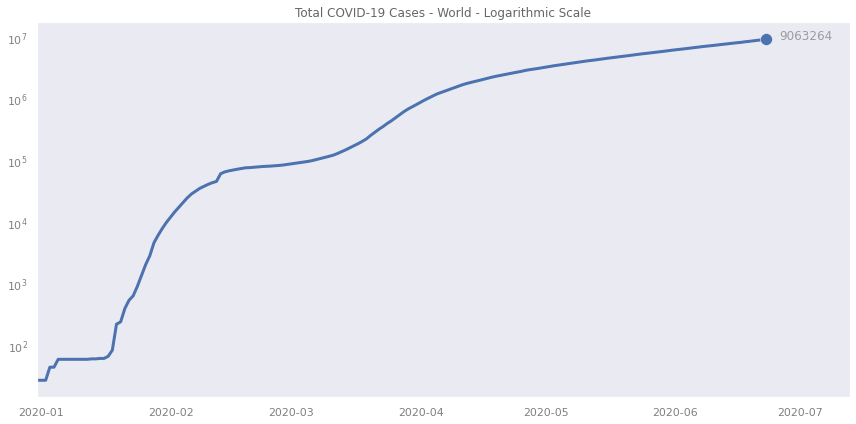

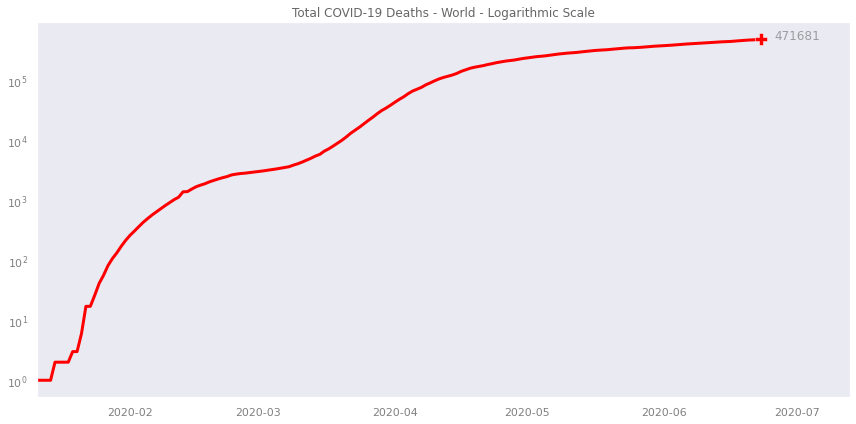

In [9]:
plot_total('world', 'cases', log=True)
print('\n')
plot_total('world', 'deaths', log=True)

Moving on, we'll write a new function to create bar plots for the top5 countries with most COVID- 19 countries and deaths. The function receives only one argument:

* kind: *{'cases', 'deaths'}, default 'cases*'
 * The kind of data to plot.

In [10]:
def plot_top5(kind='cases'):

    kind = kind.lower()

    most_recent = covid[(covid['date'] == str(last_update)) & (covid['location'] != 'World')]
    most_recent = most_recent.sort_values(by=[f'total_{kind}'], ascending=False)
    top5 = list(most_recent.iloc[:5,2])

    palette = 'Blues_r'
    col_index = 4
    if kind == 'deaths':
        palette = 'Reds_r'
        col_index = 6

    fig, ax = plt.subplots(figsize=(11,8))
    rects = ax.bar(x='location', height=f'total_{kind}', data=most_recent[:5], color=sns.color_palette(palette))

    ax.set_ylim(0, most_recent.iloc[0, col_index] * 1.15)
    ax.grid(False)
    ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=False)
    ax.ticklabel_format(axis='y', style='plain')
    ax.set_title(f'Top 5 Countries by Confirmed {kind.title()}', alpha=0.7)

    for key, spine in ax.spines.items():
        spine.set_visible(False)

    for rect, case in zip(rects, top5):
        height = rect.get_height()
        ax.text(x=rect.get_x() + rect.get_width() / 2, y=height * 0.7, s=case, ha='center', color='w', fontsize=12, fontweight='bold')
        ax.text(x=rect.get_x() + rect.get_width() / 2, y=height * 1.05, s=f'{int(height)}', ha='center', color='black', fontsize=14, alpha=0.4)
    
    plt.tight_layout()
    plt.show()

And now let's plot the bar charts.

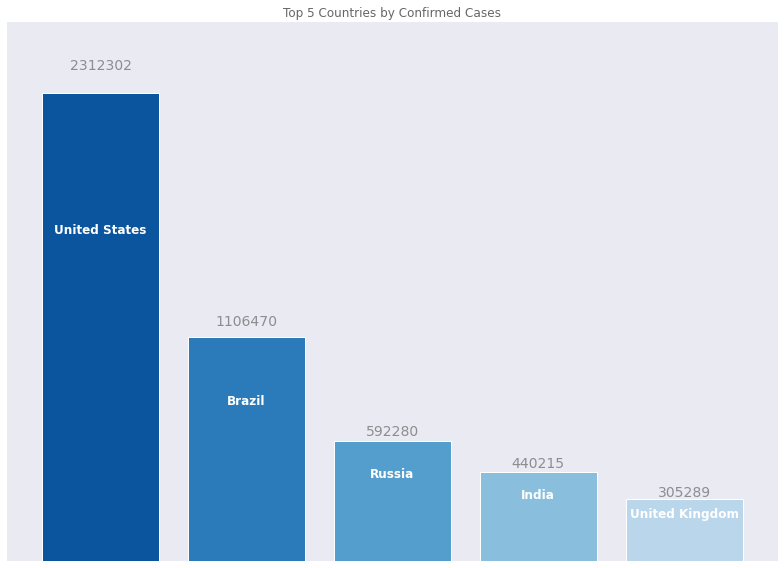

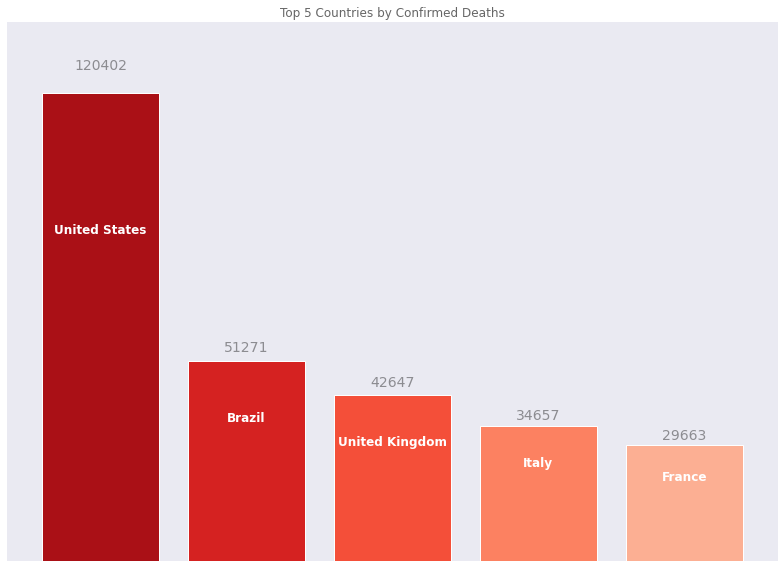

In [11]:
plot_top5()
print('\n')
plot_top5('deaths')

In [12]:
covid_pivoted = pd.DataFrame(pd.pivot_table(data=covid, values='total_cases', index='date', columns='location', fill_value=0))
covid_pivoted.drop('World', axis=1, inplace=True)
covid_pivoted.head()

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,...,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Brazil**

As mentioned in the introduction, this project will focus on Brazil's situation regarding the COVID-19 pandemic. So, from now on we'll work with the Brazil related rows in the dataset to visualize the pandemic situation in Brazil and compare it with other countries.

We'll begin by creating a new dataframe containing only the rows related to Brazil and display its first five rows.

In [13]:
brazil = covid[covid['location'] == 'Brazil']
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3313,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3314,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3315,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3316,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3317,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


We can see Brazil has zero cases in the first five rows. Let's see when the first coronavirus infection was confirmed in Brazil.

In [14]:
brazil_first_case = brazil[brazil['total_cases'] == 1].iloc[0,3]

print(f'Brazil first case was confimerd on {brazil_first_case.date()}')

Brazil first case was confimerd on 2020-02-26


Now, let's how long it took fro Brazil to confirm the first death after the first case was confirmed.

In [15]:
brazil_first_death = brazil[brazil['total_deaths'] == 1].iloc[0,3]
days_to_first_death = brazil_first_death - brazil_first_case
print(f'The first death in Brazil was confirmed {days_to_first_death.days} days after the first case, on {brazil_first_death.date()}.')

The first death in Brazil was confirmed 21 days after the first case, on 2020-03-18.


Now, let's use the `plot_total` function to see the evolution of the number of cases and deaths in Brazil since the first case was confirmed.

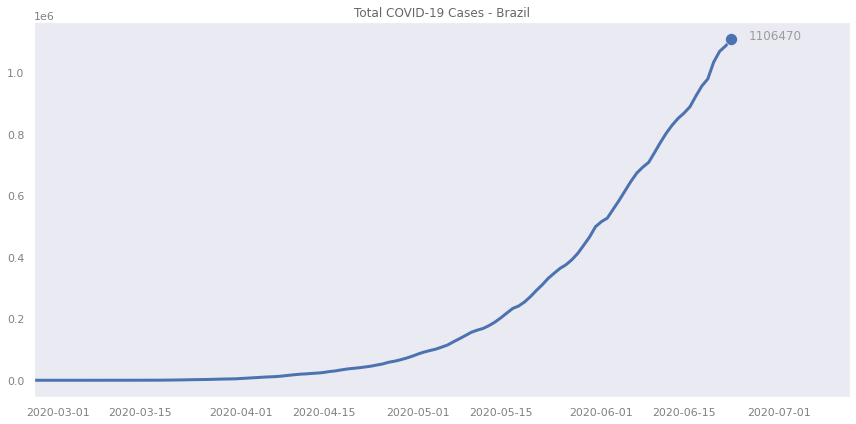

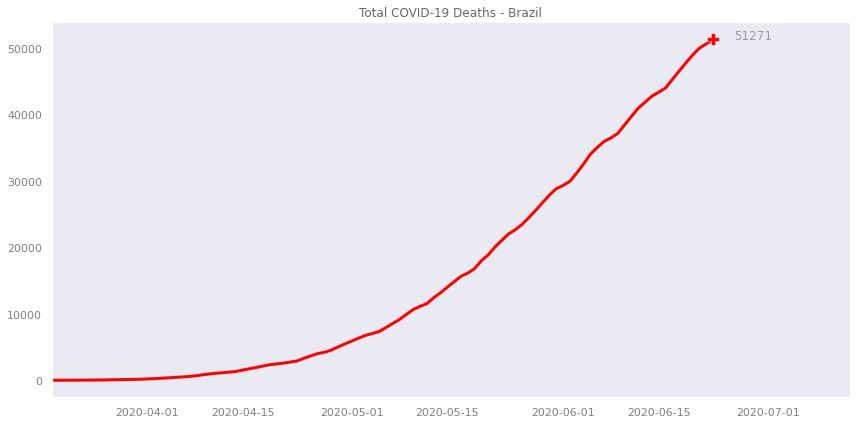

In [16]:
plot_total('brazil', 'cases')
print('\n')
plot_total('brazil', 'deaths')

We'll compare the number of daily new cases and deaths in Brazil with the top 5 countries by the number of cases. If Brazil is within this top 5, then the sixth country with most cases will be added.  We'll smooth the chart by plotting the 7-day moving average instead of the real numbers.

For that, we'll write a new function that:

* Select the top 5 countries by the number of cases;
* Calculate the 7-day moving average.
* Plot the lines for each of the top 5 countries.

The `new_cases` function receives only one argument:

* kind: *{'cases', 'deaths'}, default 'cases*'
 * The kind of data to plot.


In [17]:
covid[covid['location'] == 'International'].head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25643,NaN,NaN,International,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25644,NaN,NaN,International,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25645,NaN,NaN,International,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25646,NaN,NaN,International,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25647,NaN,NaN,International,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def new_cases(kind='cases'):

    most_recent = covid[(covid['date'] == str(last_update)) & (covid['location'] != 'World')]
    most_recent_ord = most_recent.sort_values(by=[f'total_{kind}'], ascending=False)
    top5 = list(most_recent_ord.iloc[:5,2])

    if 'Brazil' in top5:
      top5.append(most_recent_ord.iloc[5, 2])
    else:
      top5.append('Brazil')

    fig, ax = plt.subplots(figsize=(12,6))

    limx = most_recent.iloc[-1, 3] + dt.timedelta(days=40)
    ax.set_xlim(covid.iloc[0, 3], limx)
    ax.grid(False)
    for country in top5:
        color = 'grey'
        alpha = 0.3

        if country == 'Brazil':
            color = '#1f77b4'
            alpha = 1
            if kind.lower() == 'deaths':
                color = 'red'
            
        plot_df = covid[(covid['location'] == country) & (covid[f'total_{kind}'] > 0)].loc[:, ['date', f'new_{kind}']]
        plot_df['ma'] = plot_df[f'new_{kind}'].rolling(window=7).mean()

        ax.plot(plot_df['date'], plot_df['ma'], color=color, alpha=alpha, linewidth=2)
        ax.text(x=plot_df.iloc[-1, 0] + dt.timedelta(days=3), y=plot_df.iloc[-1, 2], s=f'{country}', alpha=alpha)

    ax.set_title(f'Daily New {kind.title()} - 7-Day Moving Average', alpha=0.7)
    ax.tick_params(colors='grey')

    plt.tight_layout()
    plt.show()

And now let's use the function we just created to see the 7-day moving average for the daily new cases and deaths for each country.

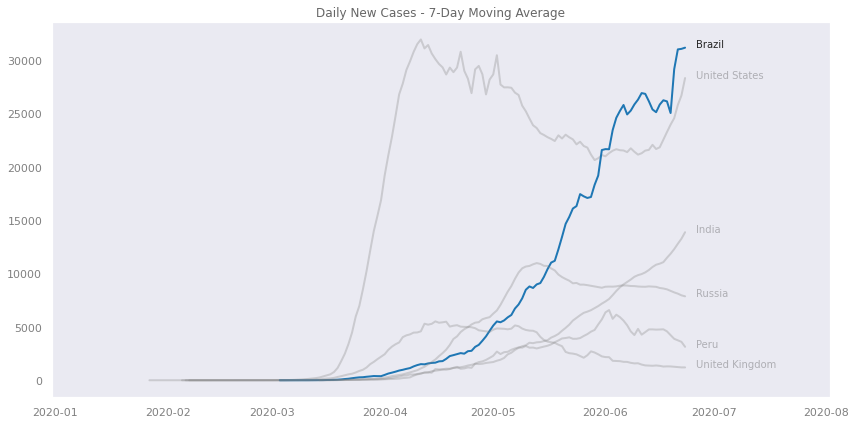

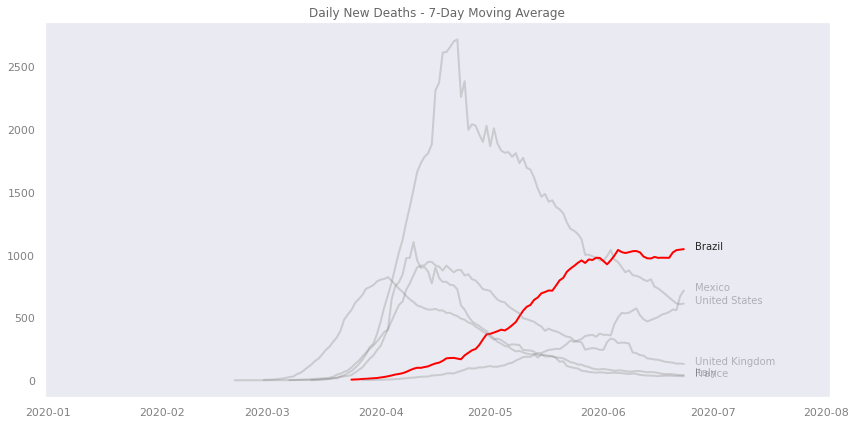

In [19]:
new_cases()
print('\n')
new_cases('deaths')

We'll now create [Waflle charts](https://pywaffle.readthedocs.io/en/latest/) to better visualize how relevant is the number of cases in Brazil when compared with the rest of the world. For that we will:

* Calculate the number of cases in the world, in Brazil, and the difference between each of them (the number in the rest of the world)

* Store this information in a dataframe that will also contain the percentages that correspond to the numbers of Brazil.

* Plot the Waffle chart
* Make some modifications in the dataframe so it becomes easier to visualize and then display it.

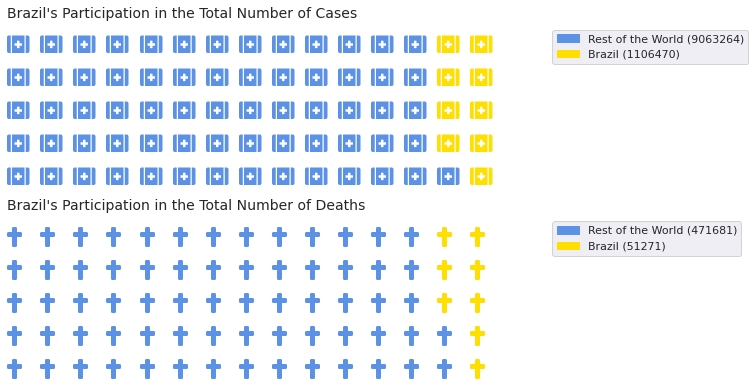

,Rest of the World,Brazil,Brazil %
Cases,7956794,1106470,12.21
Deaths,420410,51271,10.87


In [20]:
# Calculating the number of cases
world = covid[covid['location'] == 'World']
total_cases = world.iloc[-1, 4]
total_deaths = world.iloc[-1, 6]

cases_country  = brazil.iloc[-1, 4]
deaths_country = brazil.iloc[-1, 6]

rest_world_cases = total_cases - cases_country
rest_world_deaths = total_deaths - deaths_country

# Storing this information in a dataframe
df = pd.DataFrame(data={
                        'labels': ['Rest of the World', 'Brazil', 'Brazil %'],
                        'Cases': [rest_world_cases, cases_country, round(cases_country / total_cases * 100, 2)],
                        'Deaths': [rest_world_deaths, deaths_country, round(deaths_country / total_deaths * 100, 2)]
                        }).set_index('labels')
df.index.name = None

# Plotting the Waffle chart
fig = plt.figure(FigureClass=Waffle,
                  plots={
                  '311': {
                      'values': df.iloc[:2,0],
                      'labels': [f'Rest of the World ({int(total_cases)})', f'Brazil ({int(cases_country)})'],
                      'legend':{'loc': 'upper left', 'bbox_to_anchor':(1.1,1)},
                      'title':{'label':"Brazil's Participation in the Total Number of Cases", 'fontsize':14, 'loc':'left'},
                      'icons' : 'first-aid' 
                  },
                  '312': {
                      'values': df.iloc[:2,1],
                       'labels': [f'Rest of the World ({int(total_deaths)})', f'Brazil ({int(deaths_country)})'],
                      'legend':{'loc': 'upper left', 'bbox_to_anchor':(1.1,1)},
                      'title':{'label':"Brazil's Participation in the Total Number of Deaths", 'fontsize':14, 'loc':'left'},
                      'icons': 'cross'    
                        }  
                  },
                  rows=5, columns=15, colors=('#5b92e5', '#ffdf00'), figsize=(20, 10)
                  )
fig.set_tight_layout(False)
plt.show()

print('\n')
# Modifying the data frame and displaying it
df = df.T
df['Rest of the World'] = df['Rest of the World'].astype(int)
df['Brazil'] = df['Brazil'].astype(int)
display(df)

We are now interested in analyzing how the participation of Brazil in these numbers evolved through time. We'll then create a 7-day moving average line chart with the percentage of cases for Brazil since the first COVID-19 case confirmed in Brazil.

This process will take some steps. The first step is to merge the world and brazil dataframes. Notice that we are only using the columns we're interested in.

In [21]:
columns = ['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']
brazil_part = pd.merge(left=world.loc[:, columns], right=brazil.loc[:, columns], how='inner', on='date', suffixes=('_world', '_brazil'))
brazil_part.head()

,date,total_cases_world,total_deaths_world,new_cases_world,new_deaths_world,total_cases_brazil,total_deaths_brazil,new_cases_brazil,new_deaths_brazil
0,2019-12-31,27.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,44.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The next steps are:

* To calculate Brazil's participation for each column;

* To fill the null values left by divisions by zero with zero;

* To Drop the columns we are not going to use again;

* To make each a column a 7-day moving average of itself;

* To fill null values left when the moving average was calculated with zero.

In [22]:
# Calculating Brazil's participation for each column
brazil_part['total_cases'] = round(brazil_part['total_cases_brazil'] / brazil_part['total_cases_world'] * 100, 2)
brazil_part['total_deaths'] = round(brazil_part['total_deaths_brazil'] / brazil_part['total_deaths_world'] * 100, 2)
brazil_part['new_cases'] = round(brazil_part['new_cases_brazil'] / brazil_part['new_cases_world'] * 100, 2)
brazil_part['new_deaths'] = round(brazil_part['new_deaths_brazil'] / brazil_part['new_deaths_world'] * 100, 2)
print(brazil_part.tail(40))
# Filling null values
brazil_part.fillna(value=0, inplace=True)

# Dropping the columns
brazil_part.drop(labels=['total_cases_world',	'total_deaths_world',	
                         'new_cases_world',	'new_deaths_world',	'total_cases_brazil',
                         'total_deaths_brazil',	'new_cases_brazil',	'new_deaths_brazil'], 
                 axis=1, inplace=True)

# Making each a column a 7-day moving average of itself
brazil_part.iloc[:, 1:] = brazil_part.iloc[:, 1:].apply(lambda x: round(x.rolling(7).mean(), 2))

# Filling null values
brazil_part.fillna(value=0, inplace=True)

brazil_part

          date  total_cases_world  ...  new_cases  new_deaths
136 2020-05-15          4406318.0  ...      14.43       15.72
137 2020-05-16          4504351.0  ...      15.61       15.94
138 2020-05-17          4598547.0  ...      15.84       19.12
139 2020-05-18          4679764.0  ...       9.77       16.31
140 2020-05-19          4766900.0  ...      15.08       20.66
141 2020-05-20          4861975.0  ...      18.31       22.55
142 2020-05-21          4961338.0  ...      20.08       18.50
143 2020-05-22          5069262.0  ...      17.15       21.83
144 2020-05-23          5175836.0  ...      19.52       21.34
145 2020-05-24          5276942.0  ...      16.33       24.19
146 2020-05-25          5371158.0  ...      16.78       80.02
147 2020-05-26          5460254.0  ...      13.12       23.85
148 2020-05-27          5556124.0  ...      17.03       26.40
149 2020-05-28          5658707.0  ...      20.08       20.98
150 2020-05-29          5777512.0  ...      22.24       24.59
151 2020

,date,total_cases,total_deaths,new_cases,new_deaths
0,2019-12-31,0.00,0.00,0.00,0.00
1,2020-01-01,0.00,0.00,0.00,0.00
2,2020-01-02,0.00,0.00,0.00,0.00
3,2020-01-03,0.00,0.00,0.00,0.00
4,2020-01-04,0.00,0.00,0.00,0.00
...,...,...,...,...,...
171,2020-06-19,11.19,10.12,17.85,20.15
172,2020-06-20,11.35,10.24,19.69,20.83
173,2020-06-21,11.51,10.36,20.44,21.27
174,2020-06-22,11.68,10.48,20.36,20.78


With the data formatted, we'll write a final function to plot the evolution of Brazil's participation in the number of total and of new cases and deaths.

The `participation` function receives only one argument:
* kind: *{'total', 'new'}, default 'total'*
 * The kind of data to plot.

In [23]:
def participation(kind='total'):

    index = 1
    if kind.lower() == 'new':
        index = 3

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(brazil_part['date'], brazil_part[f'{kind}_cases'], label='Cases', marker='o', markersize=12, markeredgecolor='w', markeredgewidth=0.5, markevery=[-1])
    ax.plot(brazil_part['date'], brazil_part[f'{kind}_deaths'], color='red', label='Deaths', marker='P', markersize=12, markeredgecolor='w', markeredgewidth=0.5, markevery=[-1])
    ax.legend(frameon=False, loc='upper left')

    ax.text(x=brazil_part.iloc[-1, 0] + dt.timedelta(days=3), y=brazil_part.iloc[-1, index], s=f'{brazil_part.iloc[-1, index]}%', alpha=0.7)
    ax.text(x=brazil_part.iloc[-1, 0] + dt.timedelta(days=3), y=brazil_part.iloc[-1, index+1], s=f'{brazil_part.iloc[-1, index+1]}%', alpha=0.7)

    ax.set_title(f"Evolution of Brazil's Participation in the Number of {kind.title()} Cases and Deaths - 7-Day Moving Average", alpha=0.7)

    limx = brazil_part.iloc[-1, 0] + dt.timedelta(days=20)
    ax.set_xlim(brazil_part.iloc[0, 0], limx)
    ax.grid(False)
    ax.tick_params(colors='grey')

    plt.tight_layout()
    plt.show()

And now let's use this function.

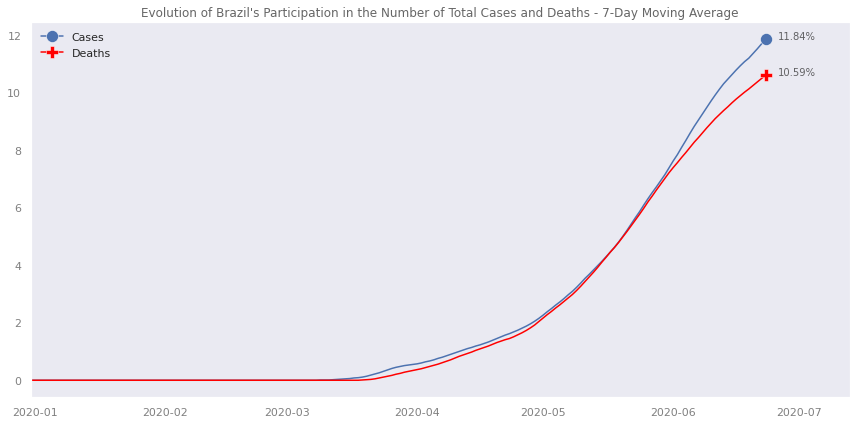

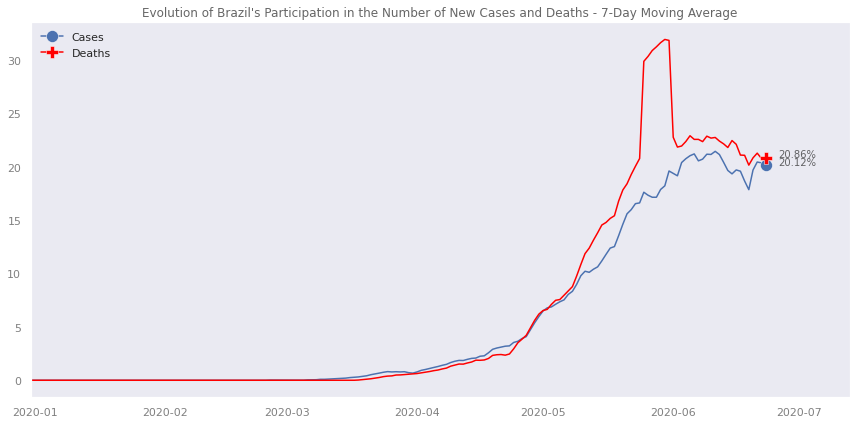

In [24]:
participation('total')
print('\n')
participation('new')

## **Conclusion**

In this project, we analyzed the COVID-19 dataset from the Our World in Data publication in three main steps:

* Exploratory data analysis

* Global situation analysis

* Analysis of the situation in brazil

As mentioned in the introduction, there will be no comments and explanations on the results as this notebook will be updated on a daily bases. However, if you are interested in that, you can read this article in my [Linkedin profile](https://www.linkedin.com/in/otavioss28/) with the analysis of the results for the day in which this notebook was first published.